# Fourier-Reihenentwicklung der periodischen Rechteck-Schwingung

Die Rechteck-Schwingung sei wie folgt definiert

$$
square(t) \stackrel{\mathrm{def}}= \begin{cases}
+1 & 0 \leq t \leq \pi \\
-1 & \pi \lt t \lt 2\pi \\
\end{cases}
$$
periodisch fortgesetzt mit einer Periode $p=2\pi$.

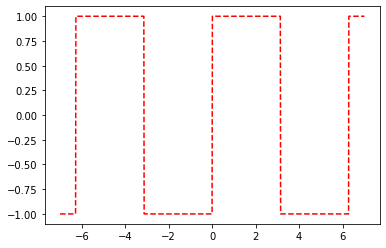

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
from scipy.integrate import quad
import math as m
import xlsxwriter
POINTS = 1000
t=np.linspace(-7,+7,POINTS) 
y=ss.square(t)

plt.plot(t,y,'r--')
plt.show()

Im Folgenden werden die $A_n$ und die $B_n$ über eine numerische Auswertung des Koeffizienten-Integrals ausgerechnet. Sie können einstellen ("AnzahlSummanden"), wie viele Reihenglieder zum Aufbau verwendet werden. Rot gestrichelt ist die originale Rechteckschwingung. Grün durchgehend jene Schwingung, die aus der angegebenen Anzahl an Summanden aufgebaut ist.

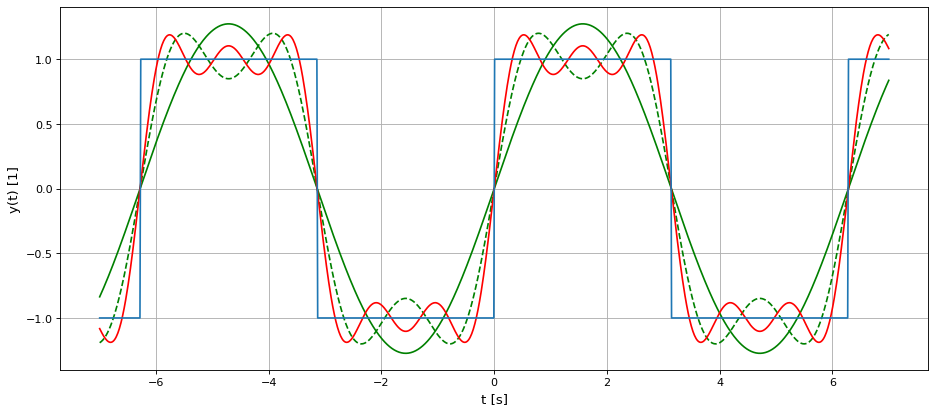

In [18]:
#Input
AnzahlSummanden = 50 #geben Sie hier an, nach wie vielen Summanden die Summe abgebrochen wird
T=2*np.pi
WRITE_EXCEL = True
#do not change anything below this line
plt.figure(figsize=(14, 6), dpi=80)
omeganull=2*np.pi/T
A_n_Function=lambda t:ss.square(t)*m.cos(n*omeganull*t)  
B_n_Function=lambda t:ss.square(t)*m.sin(n*omeganull*t)
An=[] 
Bn=[]
LineStyle=["", "", "g", "", "g--", "", "r", "", "r--"]
sum=0

for n in range(AnzahlSummanden):
    an=quad(A_n_Function,-T/2.0,T/2.0)[0]*(2.0/T)
    An.append(an)
    bn=quad(B_n_Function,-T/2.0,T/2.0)[0]*(2.0/T)    
    Bn.append(bn) 

if WRITE_EXCEL:
    workbook = xlsxwriter.Workbook('square-fourier-series.xlsx')
    worksheet = workbook.add_worksheet()
    worksheet.write(0, 0, 't')
    for i in range(t.size):
        worksheet.write(i+1, 0, t[i]);

for sum_cnt in range(2,8,2):
    if WRITE_EXCEL:
        worksheet.write(0, sum_cnt//2, "coeff="+str(sum_cnt));
    sum=An[0]/2
    for n in range(1, sum_cnt):
        sum=sum+(An[n]*np.cos(n*omeganull*t)+Bn[n]*np.sin(n*omeganull*t))
    plt.plot(t,sum,LineStyle[sum_cnt])
    if WRITE_EXCEL:
        worksheet.write(0, sum_cnt//2, "coeff="+str(sum_cnt));
        for i in range(t.size):
            worksheet.write(i+1, sum_cnt//2, sum[i]);
plt.plot(t,y)
plt.ylabel('y(t) [1]', fontsize=12) 
plt.xlabel('t [s]', fontsize=12)
plt.grid()
if WRITE_EXCEL:
    workbook.close() 
plt.show()